# Stock Price Prediction for AAPL and AMD Using LSTM

This project focuses on predicting stock prices for AAPL and AMD using deep learning models. The primary model is built using Long Short-Term Memory (LSTM) to capture the time series nature of stock data. Additionally, a modified version of the LSTM architecture is implemented to further enhance the prediction accuracy, aiming to improve key performance metrics such as RMSE, MAE, and MAPE.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

## Reading Data

In [3]:
df1 = pd.read_csv('AAPL.csv',parse_dates=['Date'],index_col=['Date'])
df2 = pd.read_csv('AMD.csv',parse_dates=['Date'],index_col=['Date'])

print("AAPL Dataset:")
print(df1.head())
print("\nAMD Dataset:")
print(df2.head())

print("\nAAPL Dataset Info:")
print(df1.info())
print("\nAMD Dataset Info:")
print(df2.info())

print("\nAAPL Dataset Statistics:")
print(df1.describe())
print("\nAMD Dataset Statistics:")
print(df2.describe())

AAPL Dataset:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400

AMD Dataset:
            Open      High       Low     Close  Adj Close  Volume
Date                                                             
1980-03-17   0.0  3.302083  3.125000  3.145833   3.145833  219600
1980-03-18   0.0  3.125000  2.937500  3.031250   3.031250  727200
1980-03-19   0.0  3.083333  3.020833  3.041667   3.041667  295200
1980-03-20   0.0  3.062500  3.010417  3.010417   3.010417  159600
1980-03-21   0.0  3.020833  2.906250  2.916667   2.916667  130800

## Missing Values

In [4]:
print("\nMissing Values in AAPL Dataset:")
print(df1.isnull().sum())
print("\nMissing Values in AMD Dataset:")
print(df2.isnull().sum())


Missing Values in AAPL Dataset:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing Values in AMD Dataset:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Closing Prices of Both Markets

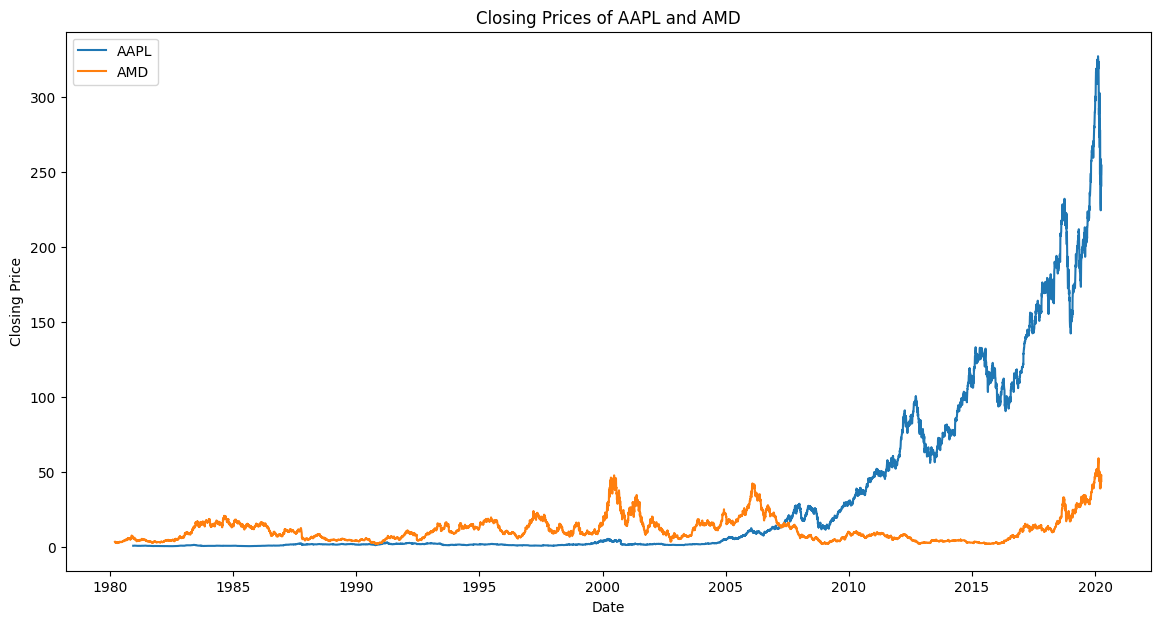

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(df1['Close'], label='AAPL')
plt.plot(df2['Close'], label='AMD')
plt.title('Closing Prices of AAPL and AMD')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Column

This data is a time series dataset, so we are using only one feature, which is the `Close` feature.

In [6]:
df1 = df1[['Close']]
df2 = df2[['Close']]

print("Head of AAPL:")
print(df1.head())

print("\nHead of AMD:")
print(df2.head())

Head of AAPL:
               Close
Date                
1980-12-12  0.513393
1980-12-15  0.486607
1980-12-16  0.450893
1980-12-17  0.462054
1980-12-18  0.475446

Head of AMD:
               Close
Date                
1980-03-17  3.145833
1980-03-18  3.031250
1980-03-19  3.041667
1980-03-20  3.010417
1980-03-21  2.916667


### Scaling

In [7]:
scaler = MinMaxScaler()

df1_scaled = scaler.fit_transform(df1)

df2_scaled = scaler.fit_transform(df2)

df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns, index=df1.index)
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns, index=df2.index)

print("Scaled AAPL Dataset:")
print(df1_scaled.head())

print("\nScaled AMD Dataset:")
print(df2_scaled.head())

Scaled AAPL Dataset:
               Close
Date                
1980-12-12  0.000969
1980-12-15  0.000887
1980-12-16  0.000778
1980-12-17  0.000812
1980-12-18  0.000853

Scaled AMD Dataset:
               Close
Date                
1980-03-17  0.026638
1980-03-18  0.024638
1980-03-19  0.024820
1980-03-20  0.024274
1980-03-21  0.022637


### Create Sequence

In [8]:
def create_sequences(data, window_size=5, horizon=1):
    X = []
    y = []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size + horizon - 1])
    return np.array(X), np.array(y)

X_aapl, y_aapl = create_sequences(df1_scaled['Close'].values, window_size=5, horizon=1)
X_amd, y_amd = create_sequences(df2_scaled['Close'].values, window_size=5, horizon=1)

### Split Data into Train, Validation, and Test Sets

In [9]:
def split_data(X, y, train_size=0.8, val_size=0.1, test_size=0.1):
    total_size = len(X)
    train_end = int(train_size * total_size)
    val_end = int((train_size + val_size) * total_size)

    X_train = X[:train_end]
    y_train = y[:train_end]

    X_val = X[train_end:val_end]
    y_val = y[train_end:val_end]

    X_test = X[val_end:]
    y_test = y[val_end:]

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train_aapl, y_train_aapl, X_val_aapl, y_val_aapl, X_test_aapl, y_test_aapl = split_data(X_aapl, y_aapl)
X_train_amd, y_train_amd, X_val_amd, y_val_amd, X_test_amd, y_test_amd = split_data(X_amd, y_amd)

### Convert Dates for Plotting

In [10]:
dates_aapl = df1_scaled.index[5:len(y_aapl) + 5]
dates_amd = df2_scaled.index[5:len(y_amd) + 5]

dates_train_aapl = dates_aapl[:len(X_train_aapl)]
dates_val_aapl = dates_aapl[len(X_train_aapl):len(X_train_aapl)+len(X_val_aapl)]
dates_test_aapl = dates_aapl[len(X_train_aapl)+len(X_val_aapl):]

dates_train_amd = dates_amd[:len(X_train_amd)]
dates_val_amd = dates_amd[len(X_train_amd):len(X_train_amd)+len(X_val_amd)]
dates_test_amd = dates_amd[len(X_train_amd)+len(X_val_amd):]

### Plot Scatter Plots

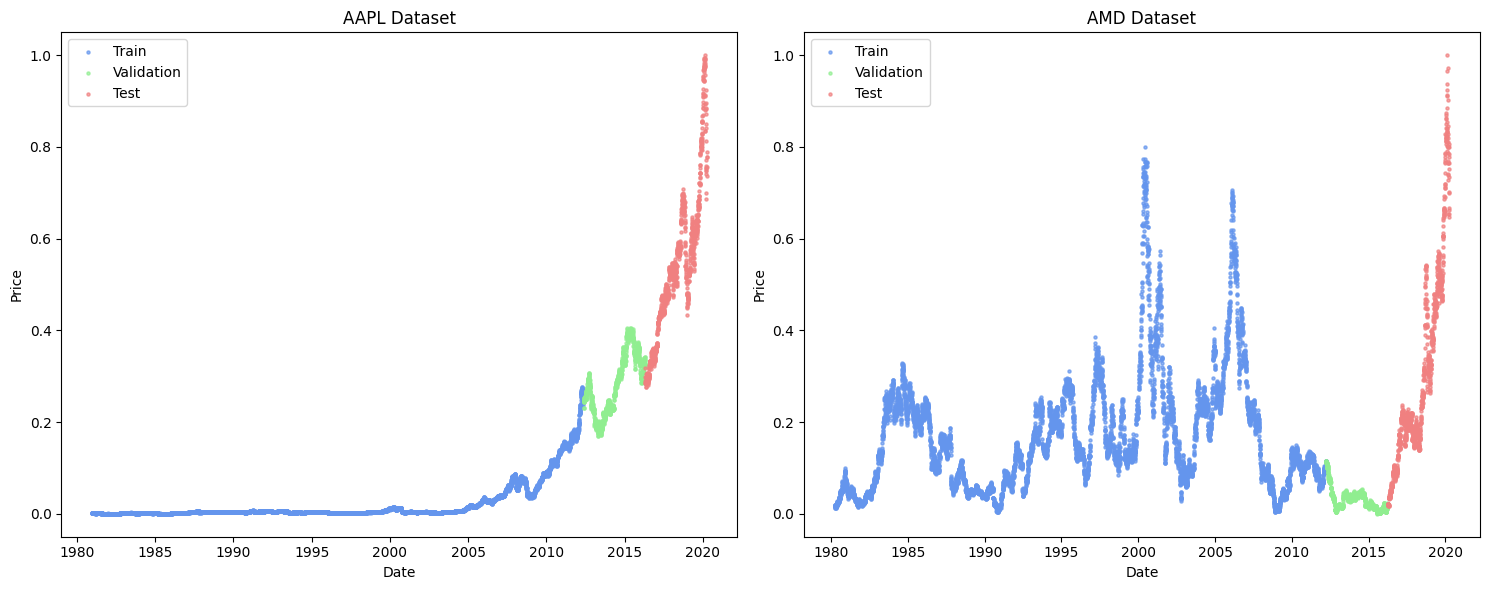

In [11]:
plt.figure(figsize=(15, 6))

# AAPL Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(dates_train_aapl, y_train_aapl, color='cornflowerblue', label='Train', s=5, alpha=0.7)
plt.scatter(dates_val_aapl, y_val_aapl, color='lightgreen', label='Validation', s=5, alpha=0.7)
plt.scatter(dates_test_aapl, y_test_aapl, color='lightcoral', label='Test', s=5, alpha=0.7)
plt.title('AAPL Dataset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# AMD Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(dates_train_amd, y_train_amd, color='cornflowerblue', label='Train', s=5, alpha=0.7)
plt.scatter(dates_val_amd, y_val_amd, color='lightgreen', label='Validation', s=5, alpha=0.7)
plt.scatter(dates_test_amd, y_test_amd, color='lightcoral', label='Test', s=5, alpha=0.7)
plt.title('AMD Dataset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

### Architecture Baseline for AAPL Dataset

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_aapl = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train_aapl.shape[1], 1)),
    Dense(units=1)
])

model_aapl.compile(optimizer='adam', loss='mean_squared_error')

model_aapl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Architecture Baseline for AMD Dataset

In [13]:
model_amd = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train_amd.shape[1], 1)),
    Dense(units=1)
])

model_amd.compile(optimizer='adam', loss='mean_squared_error')

model_amd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit AAPL Model

In [14]:
history_aapl = model_aapl.fit(X_train_aapl, y_train_aapl,
                              epochs=50,
                              batch_size=32,
                              validation_data=(X_val_aapl, y_val_aapl))

Epoch 1/50
248/248 [==============================] - 5s 10ms/step - loss: 1.8021e-04 - val_loss: 8.2170e-04
Epoch 2/50
248/248 [==============================] - 2s 8ms/step - loss: 2.3693e-06 - val_loss: 4.7641e-04
Epoch 3/50
248/248 [==============================] - 2s 8ms/step - loss: 2.4024e-06 - val_loss: 4.2759e-04
Epoch 4/50
248/248 [==============================] - 4s 15ms/step - loss: 2.5313e-06 - val_loss: 5.1563e-04
Epoch 5/50
248/248 [==============================] - 2s 9ms/step - loss: 2.6013e-06 - val_loss: 4.3974e-04
Epoch 6/50
248/248 [==============================] - 2s 9ms/step - loss: 2.3036e-06 - val_loss: 3.9871e-04
Epoch 7/50
248/248 [==============================] - 2s 8ms/step - loss: 2.5915e-06 - val_loss: 4.1493e-04
Epoch 8/50
248/248 [==============================] - 2s 9ms/step - loss: 2.3976e-06 - val_loss: 3.7167e-04
Epoch 9/50
248/248 [==============================] - 3s 12ms/step - loss: 2.6055e-06 - val_loss: 3.1866e-04
Epoch 10/50
248/248 [====

### Fit AMD Model

In [15]:
history_amd = model_amd.fit(X_train_amd, y_train_amd,
                            epochs=50,
                            batch_size=32,
                            validation_data=(X_val_amd, y_val_amd))

Epoch 1/50
253/253 [==============================] - 4s 10ms/step - loss: 0.0039 - val_loss: 1.3139e-05
Epoch 2/50
253/253 [==============================] - 2s 8ms/step - loss: 1.9268e-04 - val_loss: 7.0818e-05
Epoch 3/50
253/253 [==============================] - 3s 13ms/step - loss: 1.8510e-04 - val_loss: 1.2656e-05
Epoch 4/50
253/253 [==============================] - 2s 9ms/step - loss: 1.7149e-04 - val_loss: 1.4706e-05
Epoch 5/50
253/253 [==============================] - 2s 8ms/step - loss: 1.6519e-04 - val_loss: 8.2828e-06
Epoch 6/50
253/253 [==============================] - 2s 8ms/step - loss: 1.6229e-04 - val_loss: 1.5290e-04
Epoch 7/50
253/253 [==============================] - 2s 9ms/step - loss: 1.5706e-04 - val_loss: 1.1176e-05
Epoch 8/50
253/253 [==============================] - 2s 10ms/step - loss: 1.5044e-04 - val_loss: 1.8798e-05
Epoch 9/50
253/253 [==============================] - 3s 13ms/step - loss: 1.4123e-04 - val_loss: 4.7869e-05
Epoch 10/50
253/253 [=======

### Loss Plot

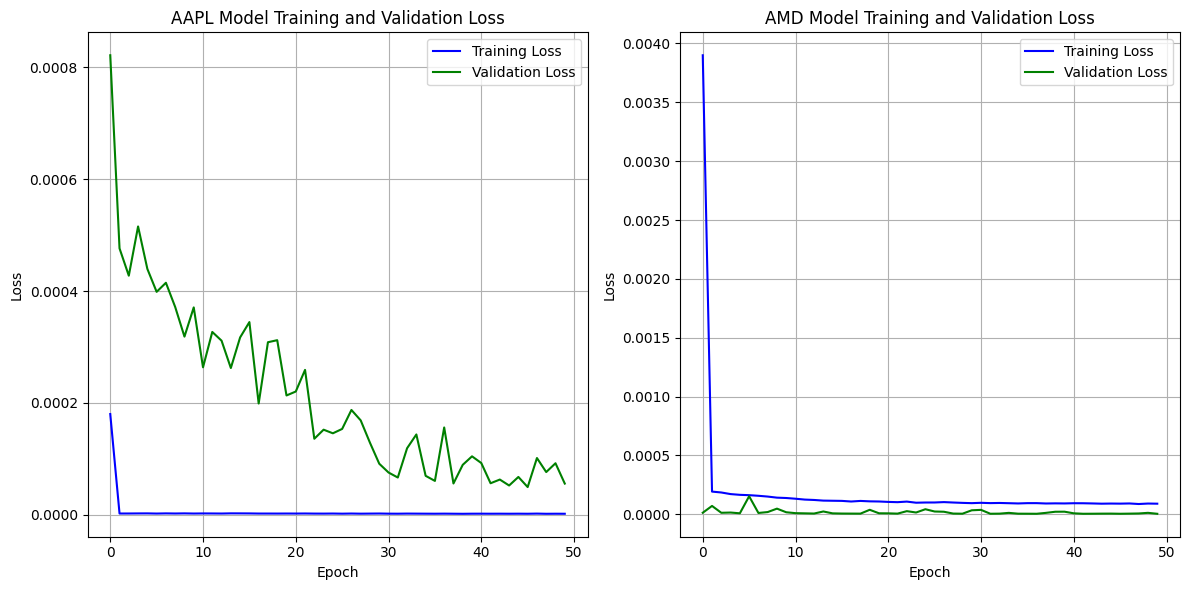

In [16]:
import matplotlib.pyplot as plt

history_aapl = history_aapl.history

history_amd = history_amd.history

# Plotting loss for AAPL model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_aapl['loss'], label='Training Loss', color='blue')
plt.plot(history_aapl['val_loss'], label='Validation Loss', color='green')
plt.title('AAPL Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting loss for AMD model
plt.subplot(1, 2, 2)
plt.plot(history_amd['loss'], label='Training Loss', color='blue')
plt.plot(history_amd['val_loss'], label='Validation Loss', color='green')
plt.title('AMD Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Evaluation

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# AAPL
y_pred_aapl = model_aapl.predict(X_test_aapl)

y_test_aapl_normal = scaler.inverse_transform(y_test_aapl.reshape(-1, 1)).flatten()
y_pred_aapl_normal = scaler.inverse_transform(y_pred_aapl.reshape(-1, 1)).flatten()

rmse_aapl = np.sqrt(mean_squared_error(y_test_aapl_normal, y_pred_aapl_normal))
mae_aapl = mean_absolute_error(y_test_aapl_normal, y_pred_aapl_normal)
mape_aapl = np.mean(np.abs((y_test_aapl_normal - y_pred_aapl_normal) / y_test_aapl_normal)) * 100


# AMD
y_pred_amd = model_amd.predict(X_test_amd)

y_test_amd_normal = scaler.inverse_transform(y_test_amd.reshape(-1, 1)).flatten()
y_pred_amd_normal = scaler.inverse_transform(y_pred_amd.reshape(-1, 1)).flatten()

rmse_amd = np.sqrt(mean_squared_error(y_test_amd_normal, y_pred_amd_normal))
mae_amd = mean_absolute_error(y_test_amd_normal, y_pred_amd_normal)
mape_amd = np.mean(np.abs((y_test_amd_normal - y_pred_amd_normal) / y_test_amd_normal)) * 100

print("AAPL Dataset Evaluation:")
print(f"RMSE: {rmse_aapl}")
print(f"MAE: {mae_aapl}")
print(f"MAPE: {mape_aapl}%")

print("\nAMD Dataset Evaluation:")
print(f"RMSE: {rmse_amd}")
print(f"MAE: {mae_amd}")
print(f"MAPE: {mape_amd}%")

32/32 [==============================] - 0s 2ms/step
AAPL Dataset Evaluation:
RMSE: 1.262178730731294
MAE: 0.9860219953509117
MAPE: 2.9497267591775818%

AMD Dataset Evaluation:
RMSE: 0.9061583567611177
MAE: 0.5209680085134978
MAPE: 2.7195330895543517%


### Actual VS Predicted

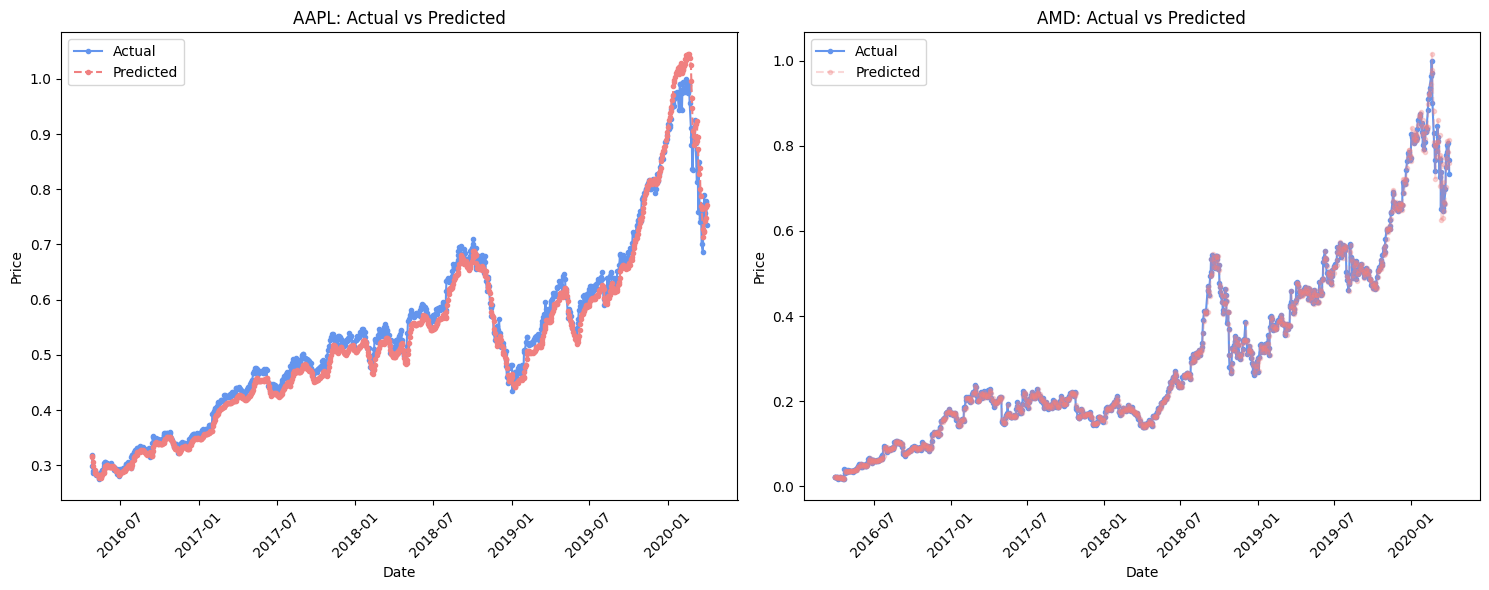

In [19]:
import matplotlib.pyplot as plt

dates_test_aapl = df1_scaled.index[-len(y_test_aapl):]

dates_test_amd = df2_scaled.index[-len(y_test_amd):]

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(dates_test_aapl, y_test_aapl, label='Actual', marker='o', color='cornflowerblue', markersize=3)
plt.plot(dates_test_aapl, y_pred_aapl, label='Predicted', marker='o', linestyle='--', color='lightcoral', markersize=3)
plt.title('AAPL: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(dates_test_amd, y_test_amd, label='Actual', marker='o', color='cornflowerblue', markersize=3)
plt.plot(dates_test_amd, y_pred_amd, label='Predicted', marker='o', linestyle='--', color='lightcoral', markersize=3, alpha=0.3)
plt.title('AMD: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Modified

# Model Modifications Explanation

## First Set of Models:

### model_aapl and model_amd

These models are relatively simpler:
- **LSTM Layer**: Each model has a single LSTM layer with 50 units and ReLU activation function.
- **Dense Layer**: Followed by a Dense layer with 1 unit, used for regression (predicting the 'Close' price).

### Reasons for Modifications:

## Second Set of Models:

### model_aapl_improved and model_amd_improved

These models are more complex:
- **Increased Complexity**: Multiple LSTM layers are stacked:
  - The first LSTM layer has 100 units and uses 'tanh' activation. It returns sequences (`return_sequences=True`), allowing the subsequent LSTM layers to receive sequences of hidden states.
  - Dropout layers (rate of 0.2) are added after each LSTM layer to reduce overfitting by randomly dropping units during training.
  - Another LSTM layer follows with 50 units and 'tanh' activation.
  - Finally, a Dense layer with 1 unit for regression.
  
- **Activation Function**: Changed to 'tanh' in LSTM layers to capture more complex patterns and long-term dependencies in time series data, which is beneficial for predicting stock prices.

- **Optimizer Change**: Switched from 'adam' to 'SGD' (Stochastic Gradient Descent). SGD updates weights iteratively based on the gradients of the loss function, potentially helping the model converge to better solutions for certain datasets or architectures.

- **Loss Function**: 'mean_squared_error' remains the loss function, suitable for regression tasks like predicting continuous values (here, predicting stock prices).

These modifications are aimed at improving the models' ability to learn intricate temporal patterns in time series data, mitigate overfitting, and potentially achieve better convergence during training, especially crucial for financial data where capturing both short-term fluctuations and long-term trends is essential.

### Model AAPL Improved

In [20]:
model_aapl_improved = Sequential([
    LSTM(units=100, activation='tanh', input_shape=(X_train_aapl.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, activation='tanh'),
    Dense(units=1)
])

model_aapl_improved.compile(optimizer='SGD', loss='mean_squared_error')

model_aapl_improved.summary()

history_aapl_improved = model_aapl_improved.fit(X_train_aapl, y_train_aapl, epochs=50, batch_size=32, validation_data=(X_val_aapl, y_val_aapl))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
248/248 [==============================] - 8s 8ms/step - loss: 0.0019 - val_loss: 0.0742
Epoch 2/50
248/248 [============================

### Model AMD Improved

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_amd_improved = Sequential([
    LSTM(units=100, activation='tanh', input_shape=(X_train_amd.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, activation='tanh'),
    Dense(units=1)
])

model_amd_improved.compile(optimizer='SGD', loss='mean_squared_error')

model_amd_improved.summary()

history_amd_improved = model_amd_improved.fit(X_train_amd, y_train_amd, epochs=50, batch_size=32, validation_data=(X_val_amd, y_val_amd))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 100)            40800     
                                                                 
 dropout_1 (Dropout)         (None, 5, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
253/253 [==============================] - 5s 10ms/step - loss: 0.0158 - val_loss: 0.0168
Epoch 2/50
253/253 [===========================

### Model Evaluation

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# AAPL
y_pred_aapl_improved = model_aapl_improved.predict(X_test_aapl)

y_test_aapl_normal = scaler.inverse_transform(y_test_aapl.reshape(-1, 1)).flatten()
y_pred_aapl_improved_normal = scaler.inverse_transform(y_pred_aapl_improved.reshape(-1, 1)).flatten()

rmse_aapl_improved = np.sqrt(mean_squared_error(y_test_aapl_normal, y_pred_aapl_improved_normal))
mae_aapl_improved = mean_absolute_error(y_test_aapl_normal, y_pred_aapl_improved_normal)
mape_aapl_improved = np.mean(np.abs((y_test_aapl_normal - y_pred_aapl_improved_normal) / y_test_aapl_normal)) * 100


# AMD
y_pred_amd_improved = model_amd_improved.predict(X_test_amd)

y_test_amd_normal = scaler.inverse_transform(y_test_amd.reshape(-1, 1)).flatten()
y_pred_amd_improved_normal = scaler.inverse_transform(y_pred_amd_improved.reshape(-1, 1)).flatten()

rmse_amd_improved = np.sqrt(mean_squared_error(y_test_amd_normal, y_pred_amd_improved_normal))
mae_amd_improved = mean_absolute_error(y_test_amd_normal, y_pred_amd_improved_normal)
mape_amd_improved = np.mean(np.abs((y_test_amd_normal - y_pred_amd_improved_normal) / y_test_amd_normal)) * 100

print("AAPL Dataset Evaluation:")
print(f"RMSE: {rmse_aapl_improved}")
print(f"MAE: {mae_aapl_improved}")
print(f"MAPE: {mape_aapl_improved}%")

print("\nAMD Dataset Evaluation:")
print(f"RMSE: {rmse_amd_improved}")
print(f"MAE: {mae_amd_improved}")
print(f"MAPE: {mape_amd_improved}%")


32/32 [==============================] - 1s 3ms/step
AAPL Dataset Evaluation:
RMSE: 26.39990341794636
MAE: 25.2104156803857
MAPE: 77.05097088417158%

AMD Dataset Evaluation:
RMSE: 1.3933468073956603
MAE: 0.8815973166191932
MAPE: 4.565622808944519%


### Loss Plot

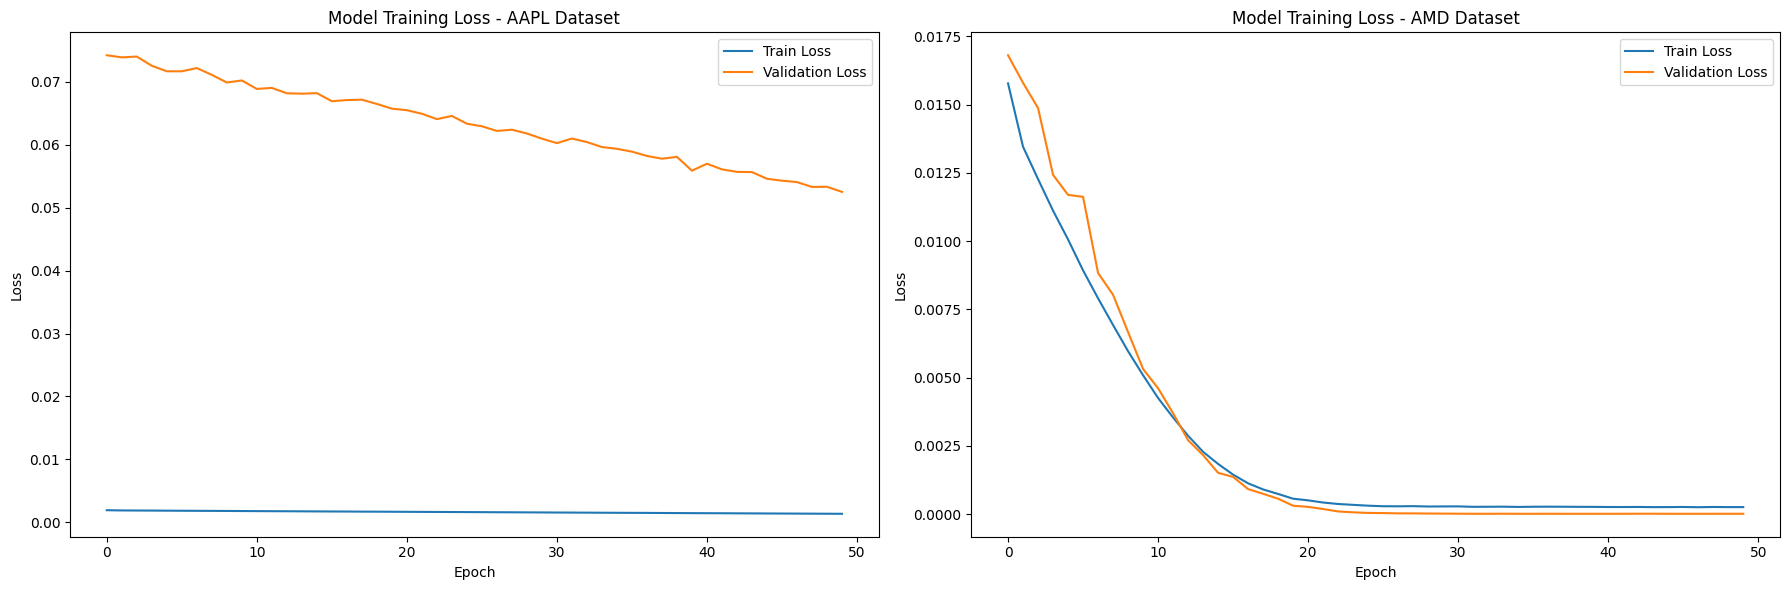

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history_aapl_improved.history['loss'], label='Train Loss')
plt.plot(history_aapl_improved.history['val_loss'], label='Validation Loss')
plt.title('Model Training Loss - AAPL Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_amd_improved.history['loss'], label='Train Loss')
plt.plot(history_amd_improved.history['val_loss'], label='Validation Loss')
plt.title('Model Training Loss - AMD Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Actual VS Predicted

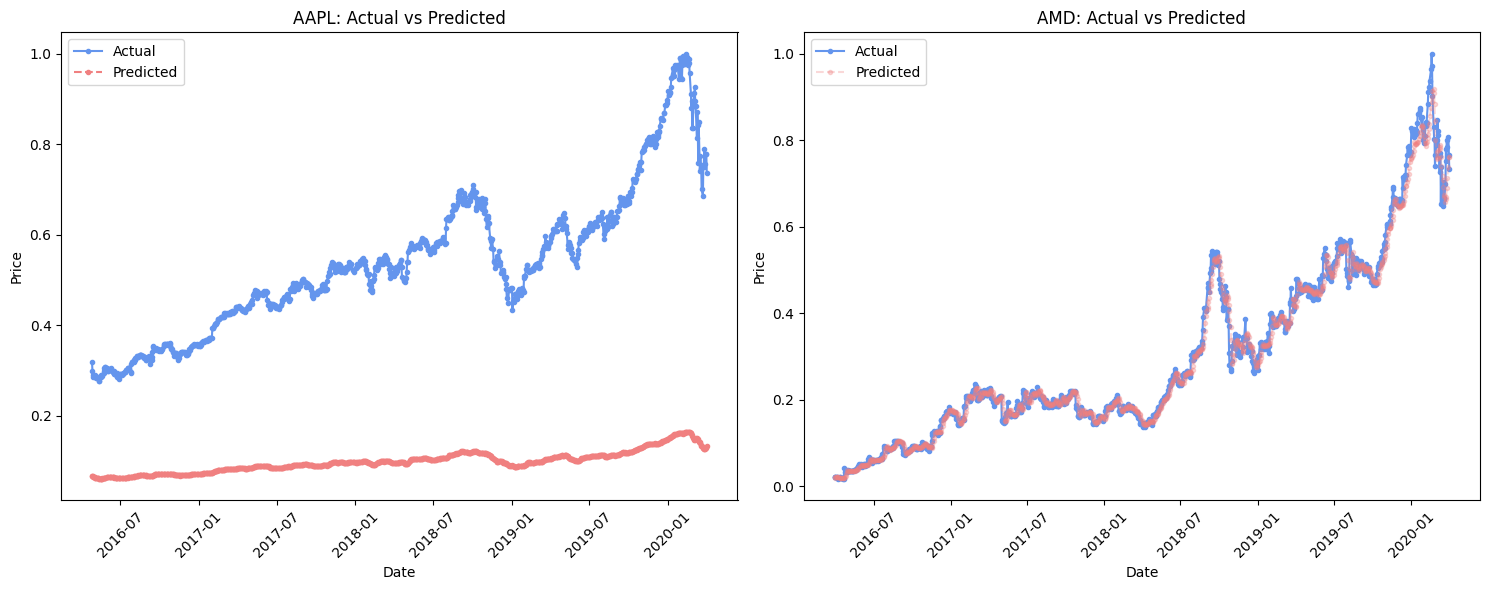

In [24]:
import matplotlib.pyplot as plt

dates_test_aapl = df1_scaled.index[-len(y_test_aapl):]

dates_test_amd = df2_scaled.index[-len(y_test_amd):]

# Plotting AAPL
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(dates_test_aapl, y_test_aapl, label='Actual', marker='o', color='cornflowerblue', markersize=3)
plt.plot(dates_test_aapl, y_pred_aapl_improved, label='Predicted', marker='o', linestyle='--', color='lightcoral', markersize=3)
plt.title('AAPL: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

# Plotting AMD
plt.subplot(1, 2, 2)
plt.plot(dates_test_amd, y_test_amd, label='Actual', marker='o', color='cornflowerblue', markersize=3)
plt.plot(dates_test_amd, y_pred_amd_improved, label='Predicted', marker='o', linestyle='--', color='lightcoral', markersize=3, alpha=0.3)
plt.title('AMD: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Explanation

### First Baseline Model:

#### AAPL Dataset Evaluation:

- **RMSE (Root Mean Squared Error)**: RMSE measures the average magnitude of the error in predicting 'Close' prices. Lower values indicate better model performance. Here, RMSE is `1.262`, suggesting that, on average, the model's predictions are about 1.262 units away from the actual 'Close' prices.
- **MAE (Mean Absolute Error)**: MAE is the average of the absolute errors between predicted and actual values. It provides a similar insight as RMSE but without squaring the errors, making it less sensitive to outliers. A lower MAE `(0.986)` indicates better accuracy.
- **MAPE (Mean Absolute Percentage Error)**: MAPE measures the average absolute percentage difference between predicted and actual values. It is useful for understanding the magnitude of the errors relative to the actual values. A lower MAPE `(2.950%)` suggests that, on average, the model's predictions deviate from the actual values by about 2.950%.

#### AMD Dataset Evaluation:

- **RMSE**: RMSE for the AMD dataset is `0.906`, indicating that the model's predictions are, on average, about 0.906 units away from the actual 'Close' prices.
- **MAE**: MAE is `0.521`, which is the average absolute difference between predicted and actual values. A lower MAE (0.521) signifies better accuracy in prediction.
- **MAPE**: MAPE is `2.720%`, indicating that, on average, the model's predictions deviate from the actual values by about 2.720%.

### Second Modified Model:

#### AAPL Dataset Evaluation:

- **RMSE**: RMSE increased significantly to `26.400`, suggesting that the second modified model's predictions have larger errors compared to the baseline model. Higher RMSE indicates poorer model performance.
- **MAE**: MAE also increased to `25.210`, indicating larger absolute errors in prediction compared to the baseline model.
- **MAPE**: MAPE is `77.051%`, indicating a higher average absolute percentage error compared to the baseline model. This suggests that the predictions of the second model deviate more significantly from the actual values in percentage terms.

#### AMD Dataset Evaluation:

- **RMSE**: RMSE is `1.393`, which is slightly higher than the baseline model's RMSE (0.906). This indicates that the second model's predictions for the AMD dataset have larger errors on average compared to the baseline model.
- **MAE**: MAE is `0.882`, which is higher than the baseline model's MAE (0.521), indicating larger absolute errors in prediction.
- **MAPE**: MAPE is `4.566%`, which is higher than the baseline model's MAPE (2.720%). This suggests that the second model's predictions deviate more significantly from the actual values in percentage terms compared to the baseline model.


# Reasons for Performance Differences Between Models

## Optimization Parameters
The choice of optimizer (`SGD` in the second model) and its parameters (learning rate, momentum) could affect how well the model converges to the optimal solution. The tuning in the hyperparameters might not have been optimal for achieving better performance.

## Activation Functions
While both models use `tanh` activation for LSTM units in the second model, activation functions influence how information flows through the network and how well gradients are propagated during training. The choice of `relu` in the baseline model might have been more suitable for the specific characteristics of the data, resulting in better performance.

## Dataset Characteristics
Time series data can be sensitive to changes in architecture and hyperparameters. The first baseline model, with a simpler architecture (single LSTM layer, fewer units), might have struck a better balance between capturing temporal dependencies and avoiding overfitting for the given dataset characteristics.


## Thank you